### Importing the libraries

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Load the Boston housing dataset

In [16]:
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [17]:
y=pd.DataFrame(housing.target,columns=housing.target_names)
X=pd.DataFrame(housing.data,columns=housing.feature_names)

In [18]:
X.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [19]:
y.head(3)

,MedHouseVal
0,4.526
1,3.585
2,3.521


### Split the dataset into training and test sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the features (mean=0 and variance=1)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define a single alpha value -alpha is the regularization strength

In [22]:
alpha = 1

### Train Ridge Regression model for the chosen alpha

In [23]:
ridge_reg = Ridge(alpha=alpha)  # 
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

### Evaluate the model

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
print("Ridge Regression")
print("Coefficients:", ridge_reg.coef_)
print("Intercept:", ridge_reg.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Print the coefficients
print('\nCoefficients:')
for feature, coef in zip(housing.feature_names, ridge_reg.coef_[0]):
    print(f'{feature}: {coef:.2f}')

Ridge Regression
Coefficients: [[ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
  -0.89616759 -0.86907074]]
Intercept: [2.07194694]
Mean Squared Error: 0.555854858943597
R^2 Score: 0.5758157428913684

Coefficients:
MedInc: 0.85
HouseAge: 0.12
AveRooms: -0.29
AveBedrms: 0.34
Population: -0.00
AveOccup: -0.04
Latitude: -0.90
Longitude: -0.87


### Get the coefficients and the feature names

In [26]:
coefficients = ridge_reg.coef_[0]
feature_names = housing.feature_names

### Plot the coefficients

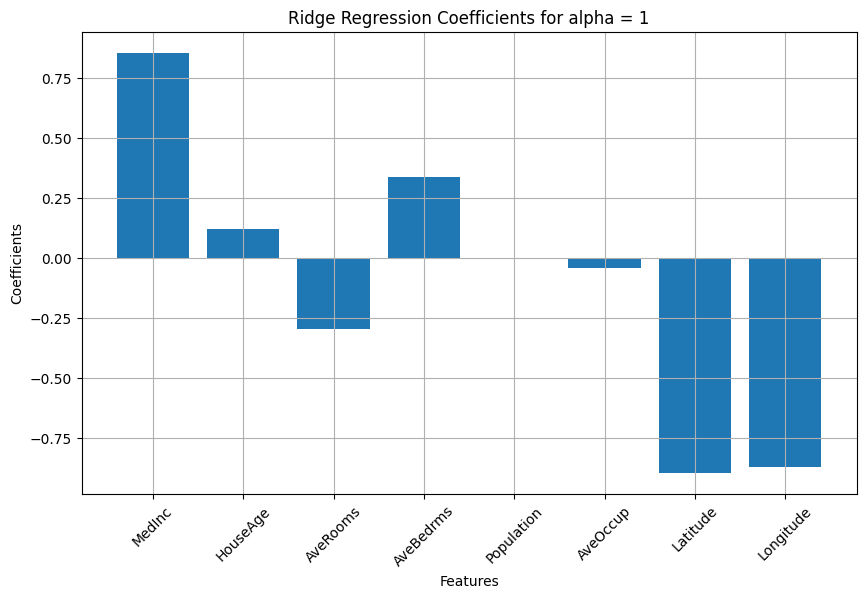

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(coefficients)), coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title(f'Ridge Regression Coefficients for alpha = {alpha}')
plt.xticks(ticks=np.arange(len(coefficients)), labels=feature_names, rotation=45)
plt.grid(True)
plt.show()